# Sanbercode Basic Python for Data Science
# Final Project Guide

- Nama   : Dean Pratama Putra
- Email  : dean.xz92@gmail.com
- Course : Python - Data Science (Batch 50)

# 1. Bussiness/Project Understanding

---

##  Objective

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

## Tentang Organisasi

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

## Penjelasan kolom fitur

- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

##  Permasalahan

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

# 3.Import Library
---

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import skew

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

# 4.Data Wragling

---

## Load Dataset

In [10]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [11]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [14]:
df.columns

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

In [22]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Eksplorasi Data

---

In [27]:
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

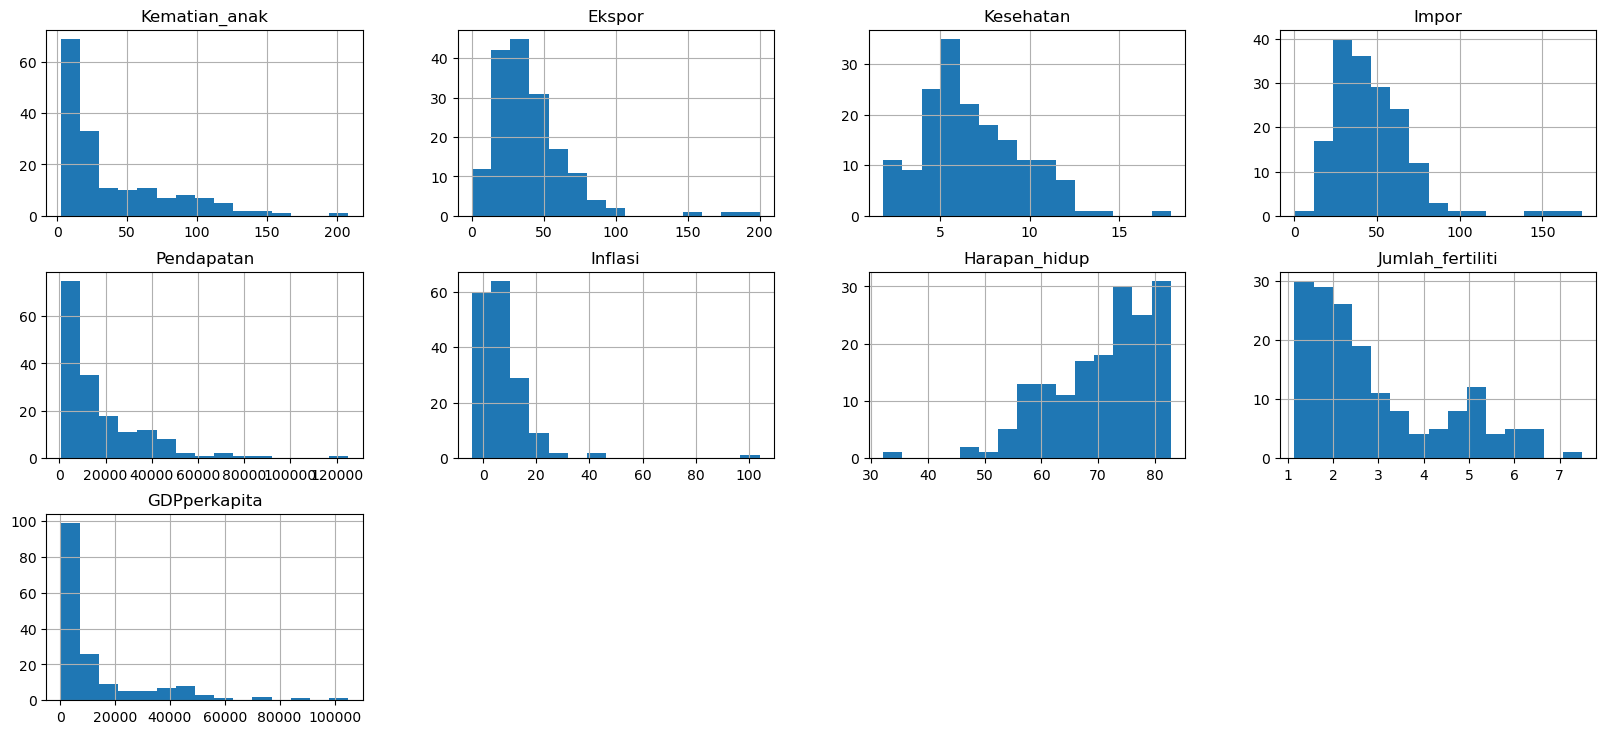

In [28]:
df[num_cols].hist(bins=15, figsize=(20,15), layout=(5, 4));

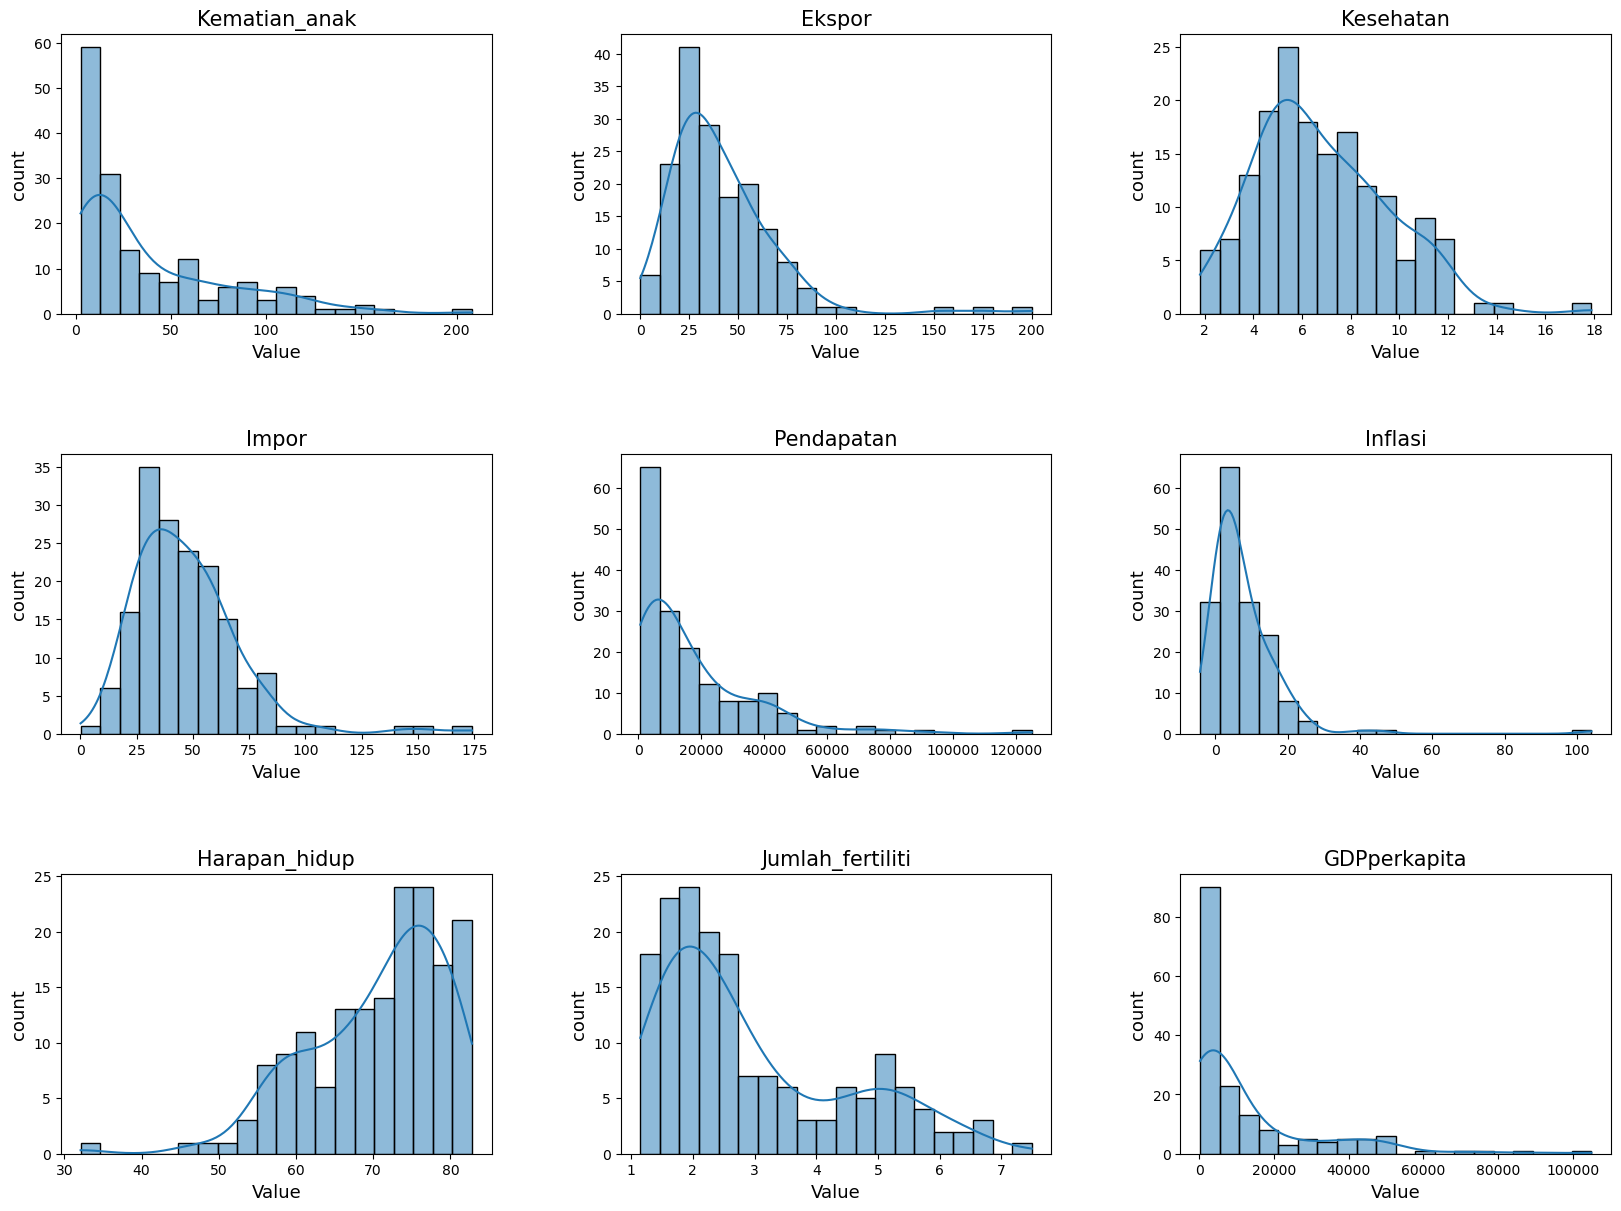

In [33]:
var_col = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)

semua fitur diatas terlihat memiliki distribusi yang tidak normal, distribusi data tersebut mengalami skewness

### korelasi masing - masing variabel

In [36]:
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7260\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Kematian_anak,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
Ekspor,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
Kesehatan,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
Impor,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
Pendapatan,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
Inflasi,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
Harapan_hidup,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
Jumlah_fertiliti,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
GDPperkapita,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7260\3337986226.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7260\3337986226.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True, mask=mask)


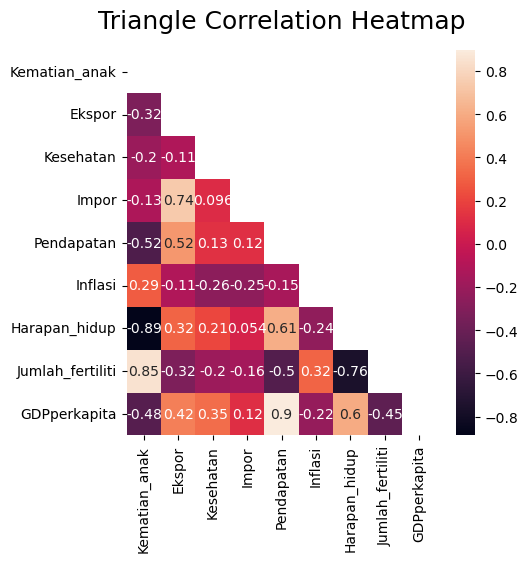

In [43]:
plt.figure(figsize=(5, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.show()

Variabel yang berkolerasi tinggi tidak berguna untuk algoritma segmentasi karena mereka merepresntasikan karakteristik yang sama dari sebuah segmen

Variabel atau fitur yang memiliki korelasi tinggi yaitu Pendapatan dan GDPperkapita dengan skor 0.9, Kematian_anak dan Jumlah_fertiliti dengan skor 0.85, Ekspor dan Impor dengan skor 0.74

> Oleh karena itu, dipilihlah feature GDPperkapita dan Kematian_anak untuk di eksplore untuk mendapatkan insight dari segi ekonomi dan kesehatan suatu negara.

dapat dilihat korelasi antar kesehatan dan kematian anak, semakin kecil nilai kesehatan maka umumnya akan menyebabkan kematian anak lebih banyak

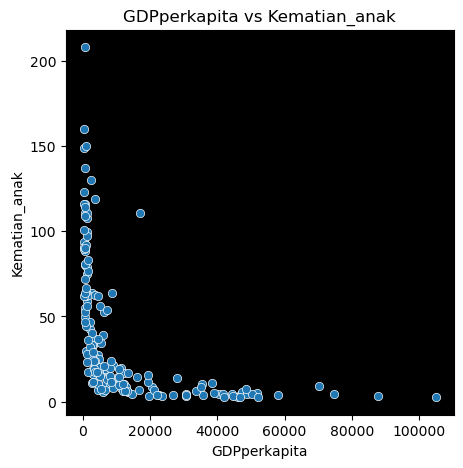

In [45]:
# membandingkan pendapatan dan kematian_anak
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_facecolor('black')
g = sns.scatterplot(x='GDPperkapita', y='Kematian_anak', data=df)
g.set_title('GDPperkapita vs Kematian_anak')
plt.show()

Dapat terilhat korelasi antar Pendapatan dan kematian anak, semakin kecil angka GDPperkapita maka terjadi lonjakan angka kematian pada anak

# Data Cleaning

## Handling missing value

In [48]:
df.isnull().sum().sort_values(ascending=False)

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [49]:
df.isnull().sum().sum()

0

## Cek keberadaan duplikasi data

In [50]:
df[df.duplicated()].sum()

Negara              0.0
Kematian_anak       0.0
Ekspor              0.0
Kesehatan           0.0
Impor               0.0
Pendapatan          0.0
Inflasi             0.0
Harapan_hidup       0.0
Jumlah_fertiliti    0.0
GDPperkapita        0.0
dtype: float64

In [51]:
df.duplicated().sum()

0

Hasilnya missing value serta duplikasi pada dataset sudah tidak ditemukan

# Handling outliers

## Boxplot feature sebelum di handling outliers

<Axes: xlabel='GDPperkapita'>

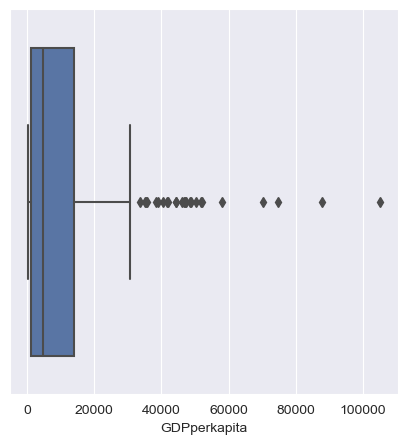

In [53]:
sns.set({'figure.figsize':(5,5)})
sns.boxplot(x='GDPperkapita', data=df)

<Axes: xlabel='Kematian_anak'>

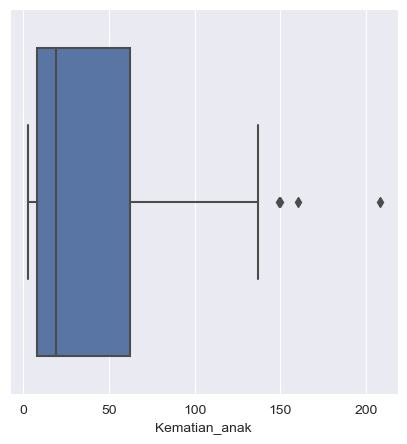

In [54]:
sns.set({'figure.figsize':(5,5)})
sns.boxplot(x='Kematian_anak', data=df)

Berdasarkan visualisasi box plot diatas terdapat beberapa kolom yang memiliki outlier. untuk meminimalisir terjadinya outlier, maka akan dilakukan teknik untuk menghandling outlier pada kolom tersebut. Cara yang dilakukan adalah kita menghapus nilai outliernya berdasarkan range nilai tertentu

## Handle outliers menggunakan interquartile range

In [55]:
# metode Interquartile range
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.08)
    Q3 = df.quantile(0.58)
    IQR =(Q3 - Q1)
    df_final = df [~ ((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
    return df_final

In [56]:
df_outlier_removed = remove_outlier_IQR(df[['GDPperkapita','Kematian_anak']])
df_outlier_removed.dropna(axis=0, inplace=True)

In [57]:
df_outlier_removed

,GDPperkapita,Kematian_anak
1,4090,16.6
2,4460,27.3
4,12200,10.3
5,10300,14.5
6,3220,18.1
...,...,...
161,1380,36.3
162,2970,29.2
163,13500,17.1
164,1310,23.3


## Boxplot features setellah di handling outliers

<Axes: xlabel='GDPperkapita'>

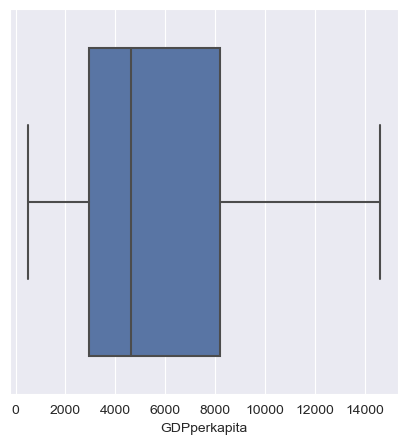

In [58]:
sns.set({'figure.figsize':(5,5)})
sns.boxplot(x='GDPperkapita', data=df_outlier_removed)

<Axes: xlabel='Kematian_anak'>

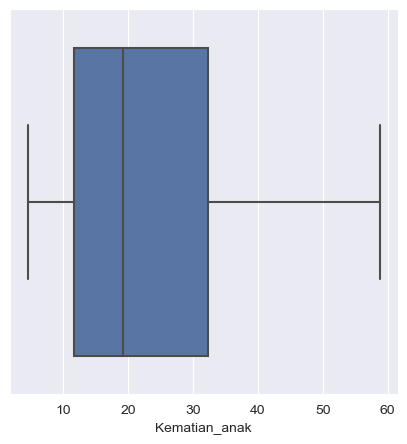

In [59]:
sns.set({'figure.figsize':(5,5)})
sns.boxplot(x='Kematian_anak', data=df_outlier_removed)

# Scalling Data

pada project ini digunakan data scaler; Standar Scalaer

In [62]:
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_removed.astype(float))

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['GDPperkapita', 'Kematian_anak'])

# Clustering Data

## Lakukan clustering menggunakan kmeans clustering dengan k=2, dan  visualisasikan

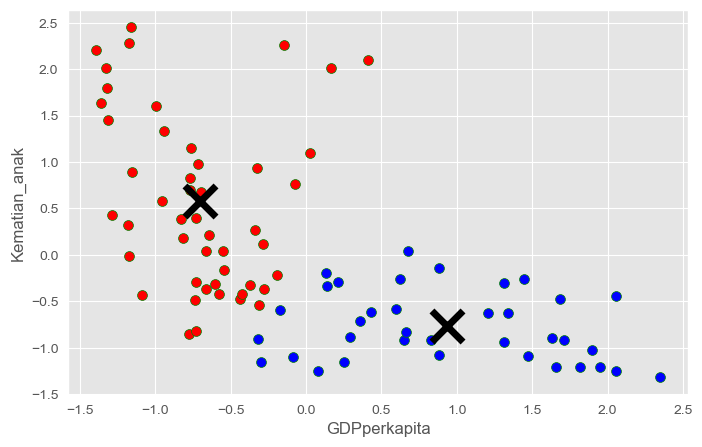

In [63]:
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_ 
new_dfoutlier_std['label_kmeans1'] = labels1

plt.figure(figsize=(8,5))
plt.scatter(new_dfoutlier_std.GDPperkapita[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans1 == 0], c='red', s = 50, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.GDPperkapita[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans1 == 1], c='blue', s = 50, edgecolor='green', linestyle='-')
                                                                                                                
centers = kmeans1.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, marker='x',lw=5)
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.show()

## Dengan menggunakan **n-clusters (Elbow Method)** untuk menentukan jumlah cluster yang tepat

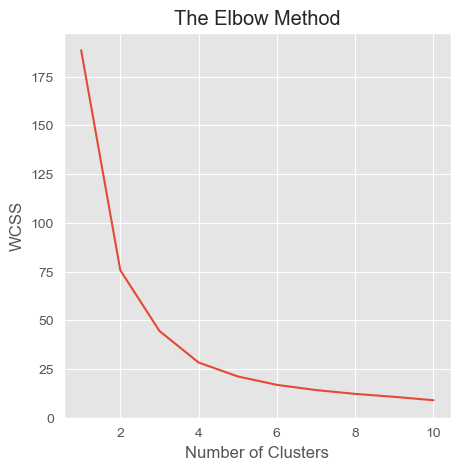

In [64]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(new_dfoutlier_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')    
plt.show()

**Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan**

In [65]:
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(dfoutlier_std)
kmeans2.labels_

array([2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1,
       0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2,
       1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0])

**visualisasi berdasarkan cluster 3**

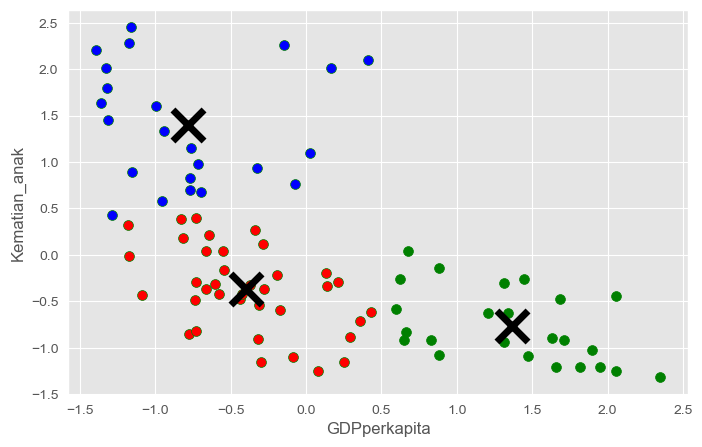

In [66]:
labels2 = kmeans2.labels_

new_dfoutlier_std['label_kmeans2'] = labels2

plt.figure(figsize=(8,5))
plt.scatter(new_dfoutlier_std.GDPperkapita[new_dfoutlier_std.label_kmeans2 == 0], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 0], c='blue', s = 50, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.GDPperkapita[new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 1], c='green', s = 50, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.GDPperkapita[new_dfoutlier_std.label_kmeans2 == 2], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 2], c='red', s = 50, edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, marker='x',lw=5)
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.show()

## Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [67]:
print(silhouette_score(new_dfoutlier_std, labels=labels1))
print(silhouette_score(new_dfoutlier_std, labels=labels2))

0.4315113329097472
0.5875074622268124


# I. Analisa Data Hasil Clustering

bisa diilihat silhoute koefisien untuk masing masing cluster
- koef silhoute untuk cluster 2 adalah 43,15%
- sedangkan silhoute untuk cluster 3 adalah 58,75%

artinya cluster 3 lebih bisa dibandingkan dan lebihh insighful dairpada cluster 2.

**Hasilnya:**

- **cluster 0 (biru)** : GDP Negara Berkembang <br>
GDP Perkapita dengan nilai -1.5< x<0.5 memiliki rerata tingkat kematian anak yang lebih rendah/masih relatif sedikit,bisa digolongkan kedalam GDP Negara Berkembang

- **cluster 1(Hijau)** : GDP Negara Maju <br>
GDP Perkapita dengan nilai x>0.5 tidak memiliki kekhawairan dengan tingkat kematian anak (x<0), tapi tidak menutup kemungkinan bisa saja terjadi hal tersebut dari lain faktor, Range GDP ini bisa digolongkan ke dalam GDP Negara Maju.

- **cluster 2(Merah)** : GDP Negara Terbelakang <br>
GDP Perkapita dengan nilai (x>0), hal ini menunjukan gdp rendah berbading terbalik dengan kematian anak. Range GDP tersebut bisa digolongkan kedalam GDP Negara Terbelakang

<b> Jadi, bisa disimpulkan bahwa GDP suatu negara berbanding terbalik dengan tingkat kematian anak.
><b> Semakin tinggi GDP perkapita pada suat negara, semakin rendah pula tingkat kematian anak, begitu juga sebaliknya.
<b> Semakin GDP perkapita pada suatu negara, semakin tinggi pula tingkat kematian anak

# Rekomendasi negara penerima bantuan

In [70]:
new_dfoutlier_std.describe()

,GDPperkapita,Kematian_anak,label_kmeans1,label_kmeans2
count,8.400000e+01,8.400000e+01,84.000000,84.000000
mean,7.401487e-17,2.801991e-16,0.428571,1.166667
std,1.006006e+00,1.006006e+00,0.497844,0.833534
min,-1.391220e+00,-1.315452e+00,0.000000,0.000000
25%,-7.418632e-01,-8.194009e-01,0.000000,0.000000
50%,-2.918404e-01,-2.990677e-01,0.000000,1.000000
75%,6.538693e-01,6.097810e-01,1.000000,2.000000
max,2.346087e+00,2.451760e+00,1.000000,2.000000


In [71]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**kriteria : kita bisa mendapatkan negara yang berhak menerima bantuan dengan mencari nilai antara min dari GDPperkapita dan max dari Kematian anak, lalu diurut secara ascending**

#Grouping negara berdasarkan kriteria

In [73]:
gdpmin = df.groupby('Negara').agg({'GDPperkapita':'min','Kematian_anak':'max'}).sort_values(by='GDPperkapita', ascending=True)
kamax = df.groupby('Negara').agg({'GDPperkapita':'min','Kematian_anak':'max'}).sort_values(by='Kematian_anak', ascending=False)
dfmerge = [gdpmin, kamax] 
newdf = pd.concat(dfmerge)
# mencari hanya 3 nilai teratas
newdf = newdf.iloc[:, [0,1]].head(3)
newdf

,GDPperkapita,Kematian_anak
Negara,,
Burundi,231,93.6
Liberia,327,89.3
"Congo, Dem. Rep.",334,116.0


### Mencari nilai presentasi total bantuan

In [74]:
newdf['Percentage_helper(%)'] = (((newdf['GDPperkapita'] / newdf['Kematian_anak'].sum()) * 100)/3).round(2).apply(lambda x: x + 0.17)
# Show the dataframe
newdf

,GDPperkapita,Kematian_anak,Percentage_helper(%)
Negara,,,
Burundi,231,93.6,25.93
Liberia,327,89.3,36.64
"Congo, Dem. Rep.",334,116.0,37.42


### Membuat visualisasi 3 Negara paling membutuhkan bantuan

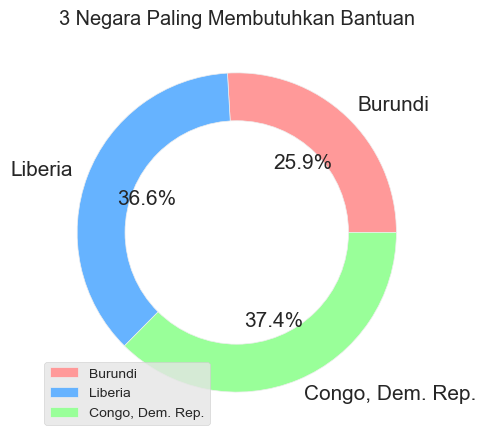

In [76]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

newdf.plot(kind='pie', y='Percentage_helper(%)', ylabel='', autopct='%1.1f%%', legend=None,colors=colors,figsize=(5, 5), fontsize=15, title="3 Negara Paling Membutuhkan Bantuan")
plt.legend(loc='lower left')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

**Dana yang tersedia dari organisasi HELP International adalah $10jt**

In [77]:
newdf["Total_Donate($)"]=newdf.apply(lambda row: (row["Percentage_helper(%)"])*10000000/100, axis=1).astype('int')
newdf.sort_values(by='Total_Donate($)', ascending=False)

,GDPperkapita,Kematian_anak,Percentage_helper(%),Total_Donate($)
Negara,,,,
"Congo, Dem. Rep.",334,116.0,37.42,3742000
Liberia,327,89.3,36.64,3664000
Burundi,231,93.6,25.93,2593000


><b>Kesimpulan:<br>
Berdasarkan hasil exploratory data analysis dengan kmeans clustering dan groupby berdasarkan kategori yang ditentukan diatas, kita dapat membantu CEO untuk memberi keputusan 'negara' mana saja yang paling perlu menjadi fokus perhatian dalam bantuan kali ini, negara berdasarkan cluster 'GDP negara terbelakang' mendapat bantuan dengan total bantuan senilai $10jt. 
>>1. Negara Congo, Dem. Rep. dengan bantuan sebesar \$3.742jt
2. Negara Liberia dengan bantuan sebesar \$3.664jt
3. Negara Burundi dengan bantuan sebesar \$2.5943jt